## 1. 데이터 분석

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format

#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
df_audi = pd.read_csv("audi.csv")
df_bmw = pd.read_csv("audi.csv")
df_cclass = pd.read_csv("cclass.csv")
df_focus = pd.read_csv("focus.csv")
df_ford = pd.read_csv("ford.csv")
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경
df_merc = pd.read_csv("merc.csv")
df_skoda = pd.read_csv("skoda.csv")
df_toyota = pd.read_csv("toyota.csv")
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vw = pd.read_csv("vw.csv")

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(108427, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10008,A3,2015,7000,Manual,112380,Diesel,0.0,74.3,1.6
8992,Q3,2015,11399,Manual,71787,Diesel,30.0,61.4,2.0
9467,A5,2019,31490,Automatic,10,Petrol,145.0,39.8,2.0
107850,Golf SV,2016,11698,Manual,12704,Petrol,30.0,55.4,1.4
56632,B Class,2019,22500,Semi-Auto,13491,Petrol,145.0,45.6,1.3
60953,C Class,2020,29990,Semi-Auto,99,Diesel,145.0,64.2,2.0
36230,Fiesta,2016,7991,Manual,10094,Petrol,125.0,54.3,1.2
103546,Tiguan,2019,19798,Manual,13901,Petrol,145.0,40.9,1.5
98159,Golf,2019,18500,Manual,50,Petrol,145.0,50.4,1.5
6272,Q3,2020,36950,Semi-Auto,2888,Petrol,150.0,39.2,1.5


In [31]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [32]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,108427.0,108427.0,108427.0,99074.0,99074.0,108427.0
mean,2017.1,16900.1,22957.5,119.7,54.6,1.6
std,2.1,9797.1,20979.0,63.7,13.2,0.5
min,1970.0,450.0,1.0,0.0,0.3,0.0
25%,2016.0,10250.0,7500.0,125.0,46.3,1.2
50%,2017.0,14721.0,17315.0,145.0,54.3,1.5
75%,2019.0,20890.0,32113.0,145.0,62.8,2.0
max,2060.0,159999.0,323000.0,580.0,256.8,6.3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108427 entries, 0 to 108426
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108427 non-null  object 
 1   year          108427 non-null  int64  
 2   price         108427 non-null  int64  
 3   transmission  108427 non-null  object 
 4   mileage       108427 non-null  int64  
 5   fuelType      108427 non-null  object 
 6   tax           99074 non-null   float64
 7   mpg           99074 non-null   float64
 8   engineSize    108427 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ MB


In [37]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

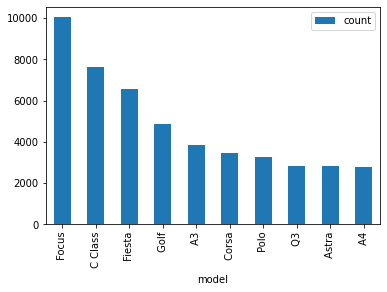

          count
model          
 Focus    10042
 C Class   7646
 Fiesta    6557
 Golf      4863
 A3        3858
 Corsa     3441
 Polo      3287
 Q3        2834
 Astra     2805
 A4        2762


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4'],
      dtype='object', name='model')

In [80]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus    10042    13401.0
 C Class   7646    23684.8
 Fiesta    6557    10196.3
 Golf      4863    16689.7
 A3        3858    17408.5
 Corsa     3441     8342.7
 Polo      3287    11341.4
 Q3        2834    22999.3
 Astra     2805    10471.4
 A4        2762    20255.5
15479.064834106117


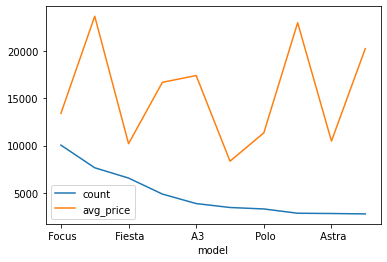

In [89]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [91]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus    10042    13401.0    2017.1
 C Class   7646    23684.8    2017.4
 Fiesta    6557    10196.3    2016.8
 Golf      4863    16689.7    2017.1
 A3        3858    17408.5    2016.7
 Corsa     3441     8342.7    2016.7
 Polo      3287    11341.4    2016.9
 Q3        2834    22999.3    2017.3
 Astra     2805    10471.4    2016.9
 A4        2762    20255.5    2017.0
2016.9935967819833


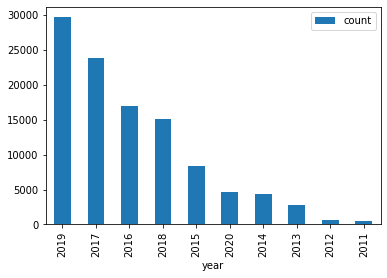

      count
year       
2019  29667
2017  23900
2016  17030
2018  15108
2015   8436
2020   4640
2014   4323
2013   2752
2012    668
2011    473


In [55]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

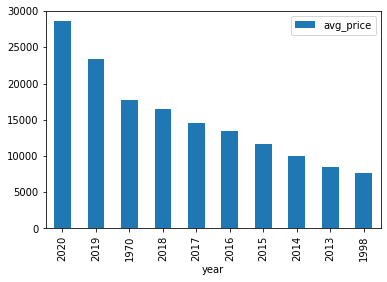

      avg_price
year           
2020    28583.7
2019    23396.8
1970    17747.0
2018    16521.6
2017    14561.8
2016    13421.2
2015    11679.4
2014    10015.5
2013     8538.5
1998     7599.7


In [70]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [69]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
9788,A3,1998,4999,Automatic,55000,Petrol,30.4,1.8
20456,A3,1998,4999,Automatic,55000,Petrol,30.4,1.8
25096,C Class,1998,1290,Automatic,140000,Petrol,NaN,2.0
44233,Fiesta,1998,2699,Manual,37000,Petrol,41.5,1.2
65278,SLK,1998,1990,Automatic,99300,Petrol,32.1,2.3
65308,S Class,1998,19990,Automatic,43534,Petrol,23.3,6.0
65322,SLK,1998,1990,Automatic,113557,Petrol,32.1,2.3
65374,SL CLASS,1998,10450,Automatic,49000,Petrol,28.2,3.2
65586,M Class,1970,24999,Automatic,14000,Diesel,39.2,0.0
79594,Land Cruiser,1998,19990,Manual,100000,Diesel,23.9,4.2


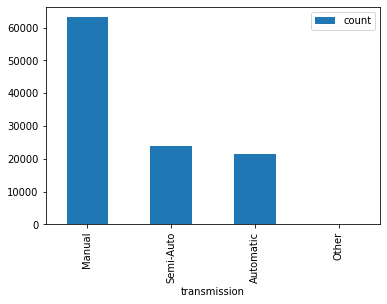

              count
transmission       
Manual        63150
Semi-Auto     23828
Automatic     21439
Other            10


In [72]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

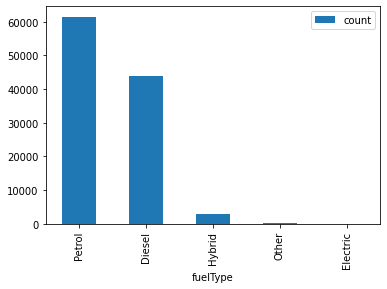

      avg_price
year           
2020    28583.7
2019    23396.8
1970    17747.0
2018    16521.6
2017    14561.8
2016    13421.2
2015    11679.4
2014    10015.5
2013     8538.5
1998     7599.7


In [74]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [ ]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#


## 2. 데이터 EDA

In [33]:
#베이스라인 모델 만들기
predict = df["price"].mean()
y_train = df["price"]

# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 7028.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


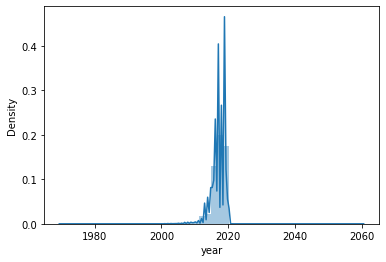

In [4]:
sns.distplot(df['year'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


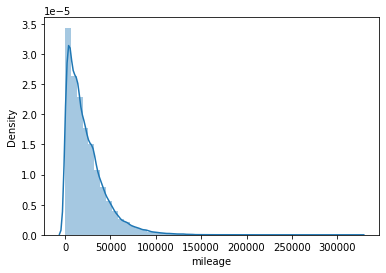

In [5]:
sns.distplot(df['mileage'], kde=True, rug=False)

16900.09885914025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


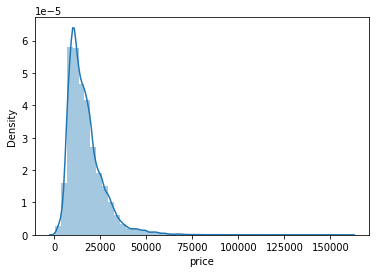

In [6]:
print(df['price'].mean())
sns.distplot(df['price'], kde=True, rug=False)

In [7]:
#이상치 제거
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['engineSize'] >= np.percentile(df['engineSize'], 0.5)) & 
        (df['engineSize'] <= np.percentile(df['engineSize'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


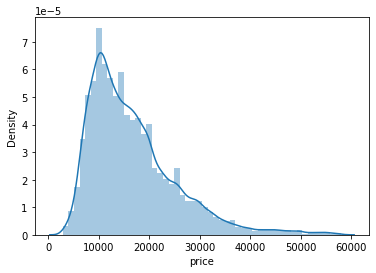

In [8]:
sns.distplot(df['price'], kde=True, rug=False)

22262.70145676869


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


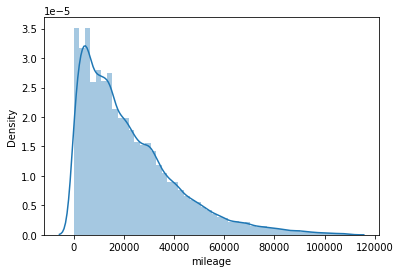

In [9]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


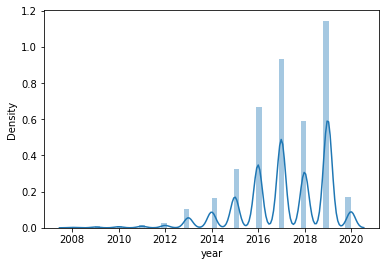

In [10]:
sns.distplot(df['year'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


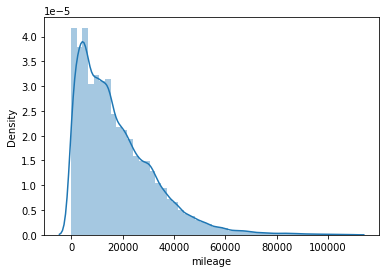

In [11]:
sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


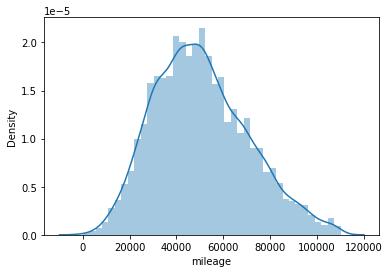

In [12]:
sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


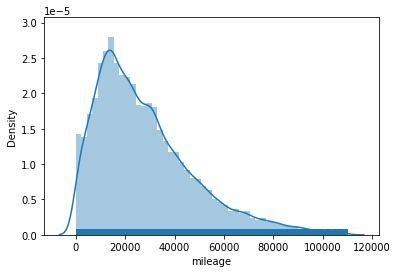

In [13]:
sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


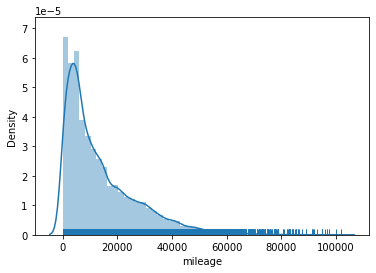

In [14]:
sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


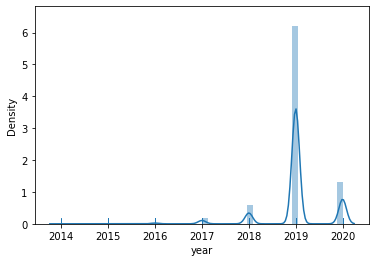

In [15]:
sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


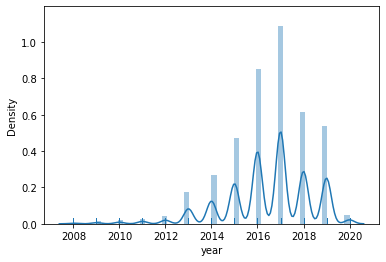

In [16]:
sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)